In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")
df


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
df.isnull().sum().any()

False

In [4]:
df.groupby(by='blueWins').size()

blueWins
0    4949
1    4930
dtype: int64

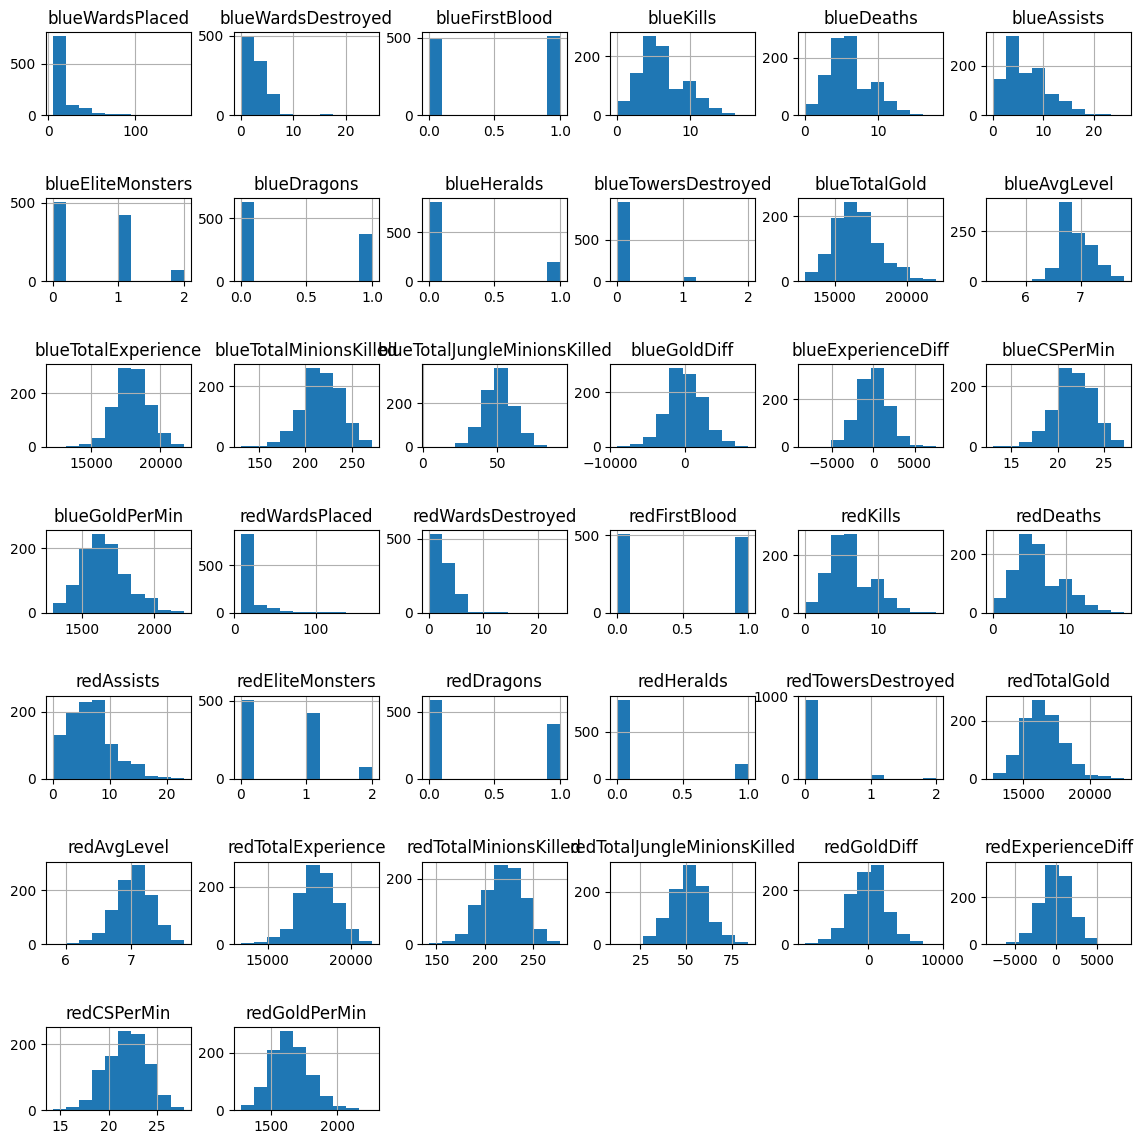

In [5]:
df.iloc[:,2:].sample(1000).hist(figsize=(14,14))
plt.rcParams['axes.titlesize'] = 5
plt.subplots_adjust(hspace=1)
plt.show()

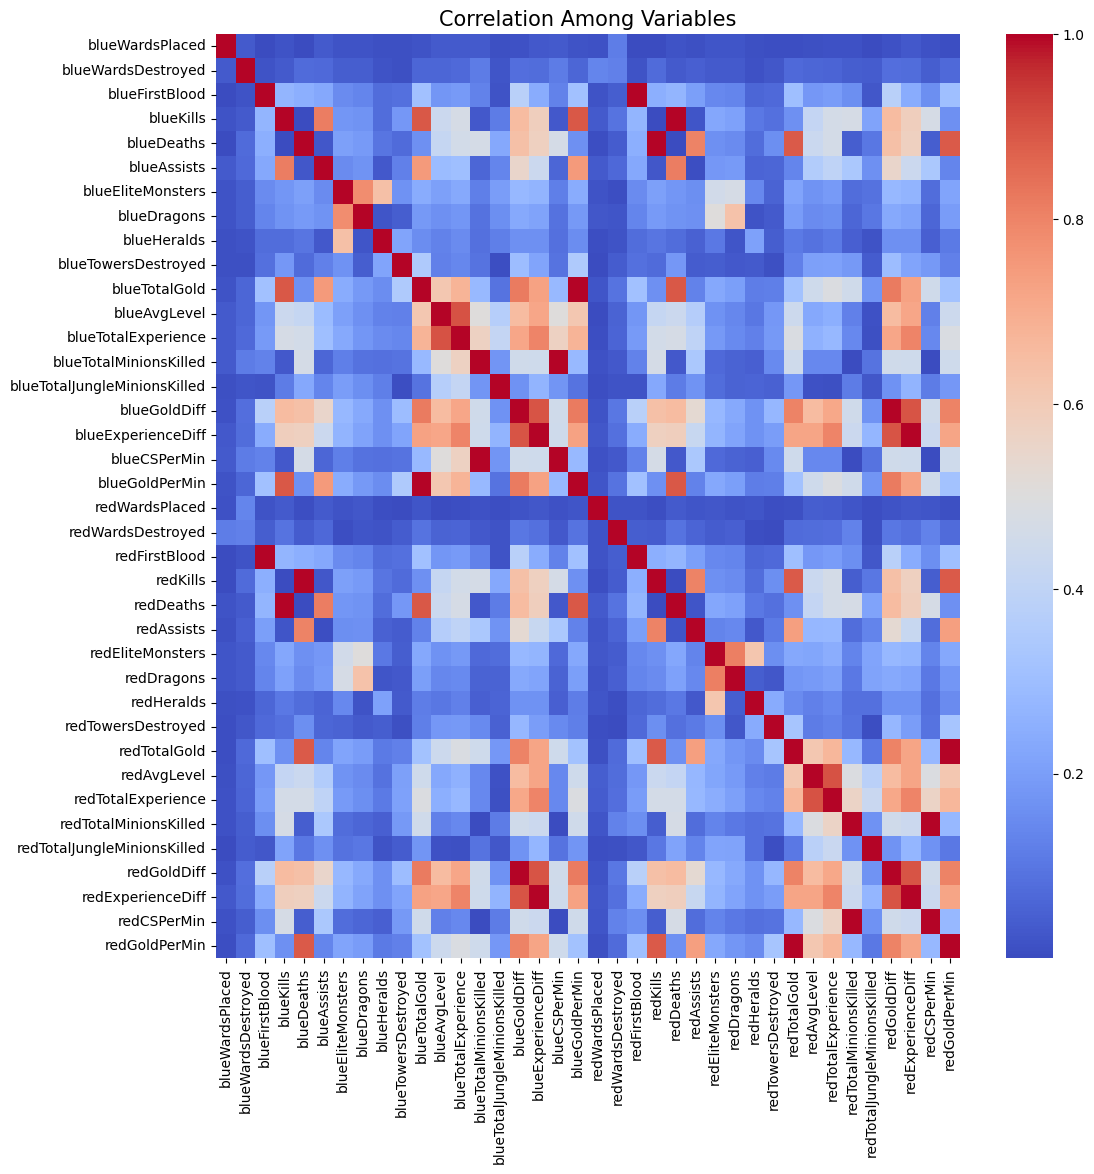

In [6]:
corr = np.abs(df.iloc[:,2:].corr())
fig, ax = plt.subplots(figsize=(12,12))
plt.rcParams['axes.titlesize'] = 15
sns.heatmap(corr, cmap='coolwarm', ax=ax)
plt.title('Correlation Among Variables')
plt.show()

In [8]:
df[['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed']].describe()


,blueWardsPlaced,redWardsPlaced,blueWardsDestroyed,redWardsDestroyed
count,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,22.367952,2.824881,2.723150
std,18.019177,18.457427,2.174998,2.138356
min,5.000000,6.000000,0.000000,0.000000
25%,14.000000,14.000000,1.000000,1.000000
50%,16.000000,16.000000,3.000000,2.000000
75%,20.000000,20.000000,4.000000,4.000000
max,250.000000,276.000000,27.000000,24.000000


In [9]:
df['blueWardsPlaced'] = pd.cut(df['blueWardsPlaced'], bins=[-float('inf'), 14,16,20, float('inf')], labels=False)
df['redWardsPlaced'] = pd.cut(df['redWardsPlaced'], bins=[-float('inf'), 14,16,20, float('inf')], labels=False)
df['blueWardsDestroyed'] = pd.cut(df['blueWardsDestroyed'], bins=[-float('inf'), 1,3,4, float('inf')], labels=False)
df['redWardsDestroyed'] = pd.cut(df['redWardsDestroyed'], bins=[-float('inf'), 1,3,4, float('inf')], labels=False)

In [10]:
df[['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed']].describe()

,blueWardsPlaced,redWardsPlaced,blueWardsDestroyed,redWardsDestroyed
count,9879.000000,9879.000000,9879.000000,9879.000000
mean,1.475757,1.469379,1.181597,1.132605
std,1.106678,1.109535,0.978314,0.970734
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000


In [11]:
df.groupby(by='blueWardsPlaced').size()

blueWardsPlaced
0    2508
1    2472
2    2590
3    2309
dtype: int64

In [ ]:
corr = np.abs(df.iloc[:,2:].corr())
corr = corr.stack().reset_index()
corr.columns = ['feature_1', 'feature_2', 'correlation(abs)']
# remove diagonal tuples (correlation to a self)
corr = corr[corr['feature_1'] != corr['feature_2']]
# remove duplicated lower left tuples under the diagonal line
# refer to https://stackoverflow.com/questions/48395350/how-to-remove-duplicates-from-correlation-in-pandas 
corr['ordered_cols'] = corr.apply(lambda x: '-'.join(sorted([x['feature_1'], x['feature_2']])), axis=1)
corr = corr.drop_duplicates(['ordered_cols'])
corr.drop(['ordered_cols'], axis=1, inplace=True)